In [1]:
import pandas as pd
import seaborn as sns


df = pd.read_csv("amostragem_zeek50000-1.csv", sep=";", dtype=str)



In [2]:
df.head

<bound method NDFrame.head of                  ts                 uid    id.orig_h id.orig_p    id.resp_h  \
0       1,52599E+15  C1OKEG4R0FgDgOtVde  1,92168E+11     39348   2021669585   
1       1,52625E+15   Cntb9T2Co0Ku1EWJI  1,92168E+11     49448    627167197   
2        1,5262E+15  C0RoTT1hRyKixmQFtb  1,92168E+11     43763  71226117203   
3       1,52627E+15  CMISuq4mI8QvEipwg5  1,92168E+11     58857    119881577   
4       1,52598E+15  CJL2uA3gclN8vEWsE3  1,92168E+11     40614   5811920841   
...             ...                 ...          ...       ...          ...   
744701  1,53257E+15  C5V10r2cli6MkCK8yc  1,92168E+11     27253   1031400106   
744702  1,53258E+15  CUAmas3jqQ7njN9pDk  1,92168E+11     15494   1473296115   
744703  1,53259E+15  CZUZPF34S2uJJiqIj6  1,92168E+11     40348  14732153250   
744704  1,53255E+15  Ce2lUE4mIlmJD1Y3Y8  1,92168E+11      7973   1473264127   
744705  1,53256E+15   CtVvTKTe9ErJ1JYa6  1,92168E+11     59381   1111185690   

       id.resp_p prot

In [3]:
df.columns
# Substitui vírgulas por ponto nas colunas (preparar para conversão numérica)
df = df.apply(lambda col: col.str.replace(",", ".", regex=False))

# Tenta converter cada coluna para o tipo mais apropriado
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        try:
            df[col] = pd.to_datetime(df[col])
        except ValueError:
            pass  # mantém como string

C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\4013729261.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\4013729261.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\4013729261.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])
C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\4013729261.py:11: UserWarning: Could not infer format, so each element will be parsed 

In [4]:
df.dtypes

ts                 float64
uid                 object
id.orig_h          float64
id.orig_p            int64
id.resp_h          float64
id.resp_p            int64
proto               object
service             object
duration            object
orig_bytes          object
resp_bytes          object
conn_state          object
local_orig          object
local_resp          object
missed_bytes         int64
history             object
orig_pkts            int64
orig_ip_bytes        int64
resp_pkts            int64
resp_ip_bytes        int64
tunnel_parents      object
label               object
detailed-label      object
__source_file__     object
dtype: object

In [5]:
print(df.dtypes)

ts                 float64
uid                 object
id.orig_h          float64
id.orig_p            int64
id.resp_h          float64
id.resp_p            int64
proto               object
service             object
duration            object
orig_bytes          object
resp_bytes          object
conn_state          object
local_orig          object
local_resp          object
missed_bytes         int64
history             object
orig_pkts            int64
orig_ip_bytes        int64
resp_pkts            int64
resp_ip_bytes        int64
tunnel_parents      object
label               object
detailed-label      object
__source_file__     object
dtype: object


In [6]:
# Mapeia os valores e converte para inteiro
df['label'] = df['label'].map({'Malicious': 0, 'Benign': 1}).astype('Int64')  # Usa Int64 que suporta NaN


In [7]:
print(df.dtypes)

ts                 float64
uid                 object
id.orig_h          float64
id.orig_p            int64
id.resp_h          float64
id.resp_p            int64
proto               object
service             object
duration            object
orig_bytes          object
resp_bytes          object
conn_state          object
local_orig          object
local_resp          object
missed_bytes         int64
history             object
orig_pkts            int64
orig_ip_bytes        int64
resp_pkts            int64
resp_ip_bytes        int64
tunnel_parents      object
label                Int64
detailed-label      object
__source_file__     object
dtype: object


In [8]:
import pandas as pd

# Supondo que seu DataFrame seja chamado df e que a coluna esteja assim nomeada:
df_encoded = pd.get_dummies(df, columns=['detailed-label'], prefix='label')

# Visualizando as primeiras linhas do novo DataFrame com encoding aplicado
print(df_encoded.head())



             ts                 uid     id.orig_h  id.orig_p     id.resp_h  \
0  1.525990e+15  C1OKEG4R0FgDgOtVde  1.921680e+11      39348  2.021670e+09   
1  1.526250e+15   Cntb9T2Co0Ku1EWJI  1.921680e+11      49448  6.271672e+08   
2  1.526200e+15  C0RoTT1hRyKixmQFtb  1.921680e+11      43763  7.122612e+10   
3  1.526270e+15  CMISuq4mI8QvEipwg5  1.921680e+11      58857  1.198816e+08   
4  1.525980e+15  CJL2uA3gclN8vEWsE3  1.921680e+11      40614  5.811921e+09   

   id.resp_p proto service  duration orig_bytes  ... label_C&C  \
0         23   tcp       -         -          -  ...     False   
1       8080   tcp       -  2.999037          0  ...     False   
2      53720   udp       -         -          -  ...     False   
3       8080   tcp       -         -          -  ...     False   
4       9527   tcp       -         -          -  ...     False   

  label_C&C-FileDownload label_C&C-HeartBeat label_C&C-HeartBeat-Attack  \
0                  False               False               

In [9]:
# Converte valores booleanos para inteiros (1/0)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if col.startswith('label_')})


In [10]:
label_columns = [col for col in df_encoded.columns if col.startswith('label_')]
print(df_encoded[label_columns].head())


   label_-  label_Attack  label_C&C  label_C&C-FileDownload  \
0        0             0          0                       0   
1        0             0          0                       0   
2        1             0          0                       0   
3        0             0          0                       0   
4        0             0          0                       0   

   label_C&C-HeartBeat  label_C&C-HeartBeat-Attack  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   

   label_C&C-PartOfAHorizontalPortScan  label_C&C-Torii  label_DDoS  \
0                                    0                0           0   
1                                    0                0           0   
2                                    0                0           0   
3           

In [11]:
import pandas as pd

# Certifique-se de que a coluna label está como string ou categórica
# Se ela estiver em números (0/1), mapeie de volta ou mantenha, desde que você saiba o que significa

# Filtra os dois grupos
benignos = df[df['label'] == 1]
maliciosos = df[df['label'] == 0]

# Define o número desejado de amostras para cada classe
n_amostras = 50000

# Verifica se há amostras suficientes em cada grupo
if len(benignos) < n_amostras or len(maliciosos) < n_amostras:
    raise ValueError("Uma das classes não tem amostras suficientes (pelo menos 50.000 de cada)")

# Faz a amostragem aleatória com 50.000 linhas de cada
amostra_benigna = benignos.sample(n=n_amostras, random_state=42)
amostra_maliciosa = maliciosos.sample(n=n_amostras, random_state=42)

# Junta os dois subconjuntos e embaralha
amostra_balanceada = pd.concat([amostra_benigna, amostra_maliciosa]).sample(frac=1, random_state=42).reset_index(drop=True)

# Visualiza a distribuição da nova amostra
print(amostra_balanceada['label'].value_counts())

label
0    50000
1    50000
Name: count, dtype: Int64


In [12]:
# Suponha que df seja o seu DataFrame

# Seleciona apenas as colunas que começam com "label_"
label_columns = [col for col in df.columns if col.startswith("label_")]

# Conta o número de vezes que o valor é 1 em cada coluna de label
label_counts = df_encoded[label_columns].sum().sort_values(ascending=False)

# Exibe o resultado
print(label_counts)


Series([], dtype: float64)


In [13]:
# Filtra as colunas que começam com "label_"
label_columns = [col for col in df_encoded.columns if col.startswith("label_")]

# Conta a quantidade de vezes que cada label tem valor 1 (True)
label_counts = df_encoded[label_columns].sum().sort_values(ascending=False)

print(label_counts)


label_PartOfAHorizontalPortScan        412677
label_Okiru                            130689
label_-                                 96589
label_DDoS                              87737
label_C&C                               14968
label_Attack                             1890
label_C&C-HeartBeat                        90
label_C&C-Torii                            30
label_C&C-FileDownload                     15
label_C&C-HeartBeat-Attack                 11
label_C&C-PartOfAHorizontalPortScan         6
label_FileDownload                          4
dtype: int64


In [14]:
df.dtypes
df_encoded.dtypes

ts                                     float64
uid                                     object
id.orig_h                              float64
id.orig_p                                int64
id.resp_h                              float64
id.resp_p                                int64
proto                                   object
service                                 object
duration                                object
orig_bytes                              object
resp_bytes                              object
conn_state                              object
local_orig                              object
local_resp                              object
missed_bytes                             int64
history                                 object
orig_pkts                                int64
orig_ip_bytes                            int64
resp_pkts                                int64
resp_ip_bytes                            int64
tunnel_parents                          object
label        

In [15]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [16]:
from sklearn.utils import resample
classes_desejadas = [
    "-",
    "C&C-HeartBeat",
    "DDoS",
    "Okiru",
    "PartOfAHorizontalPortScan",
    "C&C",
    "Attack"
]

df_filtrado = df[df['detailed-label'].isin(classes_desejadas)].copy()
df_filtrado.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label,__source_file__
0,1.525990e+15,C1OKEG4R0FgDgOtVde,1.921680e+11,39348,2.021670e+09,23,tcp,-,-,-,...,0,S,1,60,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
1,1.526250e+15,Cntb9T2Co0Ku1EWJI,1.921680e+11,49448,6.271672e+08,8080,tcp,-,2.999037,0,...,0,S,3,180,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
2,1.526200e+15,C0RoTT1hRyKixmQFtb,1.921680e+11,43763,7.122612e+10,53720,udp,-,-,-,...,0,D,1,40,0,0,(empty),1,-,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
3,1.526270e+15,CMISuq4mI8QvEipwg5,1.921680e+11,58857,1.198816e+08,8080,tcp,-,-,-,...,0,S,1,60,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
4,1.525980e+15,CJL2uA3gclN8vEWsE3,1.921680e+11,40614,5.811921e+09,9527,tcp,-,-,-,...,0,S,1,60,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...


In [17]:
amostras_por_classe = 10000
df_balanceado = []

for classe in classes_desejadas:
    df_classe = df_filtrado[df_filtrado['detailed-label'] == classe]
    
    # Se não houver dados para essa classe, pular
    if len(df_classe) == 0:
        print(f"⚠️ Classe '{classe}' não encontrada no dataset.")
        continue
    
    if len(df_classe) >= amostras_por_classe:
        df_amostrado = df_classe.sample(n=amostras_por_classe, random_state=42)
    else:
        df_amostrado = resample(
            df_classe,
            replace=True,
            n_samples=amostras_por_classe,
            random_state=42
        )
    
    df_balanceado.append(df_amostrado)

# Concatenar e salvar
df_final = pd.concat(df_balanceado, ignore_index=True)

In [18]:
print(df_final['detailed-label'].value_counts())

detailed-label
-                            10000
C&C-HeartBeat                10000
DDoS                         10000
Okiru                        10000
PartOfAHorizontalPortScan    10000
C&C                          10000
Attack                       10000
Name: count, dtype: int64


In [19]:
df_final['detailed-label'] = df_final['detailed-label'].replace("-", "Benign")
df_final_encoded = pd.get_dummies(df_final, columns=["detailed-label"], prefix="label")

In [20]:
df_final_encoded.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', '__source_file__', 'label_Attack',
       'label_Benign', 'label_C&C', 'label_C&C-HeartBeat', 'label_DDoS',
       'label_Okiru', 'label_PartOfAHorizontalPortScan'],
      dtype='object')

In [21]:
label_columns = [col for col in df_final_encoded.columns if col.startswith('label_')]
print(df_final_encoded[label_columns].head(10))


   label_Attack  label_Benign  label_C&C  label_C&C-HeartBeat  label_DDoS  \
0         False          True      False                False       False   
1         False          True      False                False       False   
2         False          True      False                False       False   
3         False          True      False                False       False   
4         False          True      False                False       False   
5         False          True      False                False       False   
6         False          True      False                False       False   
7         False          True      False                False       False   
8         False          True      False                False       False   
9         False          True      False                False       False   

   label_Okiru  label_PartOfAHorizontalPortScan  
0        False                            False  
1        False                            False  
2 

In [22]:
# Converte todas as colunas de label_ para 1/0
label_columns = [col for col in df_final_encoded.columns if col.startswith('label_')]
df_final_encoded[label_columns] = df_final_encoded[label_columns].astype(int)


In [23]:
print(df_final_encoded[label_columns].head(10))


   label_Attack  label_Benign  label_C&C  label_C&C-HeartBeat  label_DDoS  \
0             0             1          0                    0           0   
1             0             1          0                    0           0   
2             0             1          0                    0           0   
3             0             1          0                    0           0   
4             0             1          0                    0           0   
5             0             1          0                    0           0   
6             0             1          0                    0           0   
7             0             1          0                    0           0   
8             0             1          0                    0           0   
9             0             1          0                    0           0   

   label_Okiru  label_PartOfAHorizontalPortScan  
0            0                                0  
1            0                                0  
2 

In [24]:
df_final.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [25]:
amostra_balanceada.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [26]:
amostra_balanceada.head(100)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label,__source_file__
0,1.532540e+15,COfbht2C3LlsJtur51,1.921680e+11,49163,1.473220e+10,23,tcp,-,-,-,...,0,S,1,40,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
1,1.551410e+15,CVY8rX3FqOiTkL40Ii,1.921681e+09,56448,9.110254e+07,23,tcp,-,0.000002,0,...,0,S,2,120,0,0,-,0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
2,1.547150e+15,CzVmSc4Gw0wcimLrjj,1.921681e+09,54580,8.918316e+09,23,tcp,-,-,-,...,0,S,1,40,0,0,-,1,-,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
3,1.545450e+15,COqoU82Oyd88uNTFzk,1.921681e+09,40948,2.099719e+10,80,tcp,-,4.204601,0,...,0,I,4,160,0,0,-,0,DDoS,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
4,1.532540e+15,CSjgIg1VQYlx8bbwK8,1.921680e+11,30297,1.891770e+11,81,tcp,-,-,-,...,0,S,1,40,0,0,(empty),0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.536310e+15,CNGJmI1ILxVvpITeYi,1.921680e+11,18344,1.976378e+08,52869,tcp,-,0.000002,0,...,0,S,2,80,0,0,-,0,DDoS,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
96,1.547070e+15,ChqZLn4bOzgJJR23Oc,1.921681e+09,32951,1.411012e+09,22,tcp,-,-,-,...,0,S,1,40,0,0,-,0,PartOfAHorizontalPortScan,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
97,1.536290e+15,C0pOGd3OLfdlhJqna1,1.921680e+11,18344,1.971062e+10,52869,tcp,-,0.000002,0,...,0,S,2,80,0,0,-,0,DDoS,iot_logs/opt/Malware-Project/BigDataset/IoTSce...
98,1.545460e+15,CXfW9O2wrKUeOyE3b7,1.921681e+09,43942,1.511890e+11,23,tcp,-,-,-,...,0,S,1,60,0,0,-,1,-,iot_logs/opt/Malware-Project/BigDataset/IoTSce...


In [27]:
df_final.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [28]:
df_final_encoded.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', '__source_file__', 'label_Attack',
       'label_Benign', 'label_C&C', 'label_C&C-HeartBeat', 'label_DDoS',
       'label_Okiru', 'label_PartOfAHorizontalPortScan'],
      dtype='object')

In [29]:
amostra_balanceada.dtypes

ts                 float64
uid                 object
id.orig_h          float64
id.orig_p            int64
id.resp_h          float64
id.resp_p            int64
proto               object
service             object
duration            object
orig_bytes          object
resp_bytes          object
conn_state          object
local_orig          object
local_resp          object
missed_bytes         int64
history             object
orig_pkts            int64
orig_ip_bytes        int64
resp_pkts            int64
resp_ip_bytes        int64
tunnel_parents      object
label                Int64
detailed-label      object
__source_file__     object
dtype: object

In [30]:
# Convertendo as colunas para string
amostra_balanceada['id.orig_h'] = amostra_balanceada['id.orig_h'].astype(str)
amostra_balanceada['id.resp_h'] = amostra_balanceada['id.resp_h'].astype(str)

# Função para verificar IPs privados
def is_private_ip(ip):
    return (ip.startswith('10.') or 
            ip.startswith('192.168.') or 
            (ip.startswith('172.') and 16 <= int(ip.split('.')[1]) <= 31))

# Criando as colunas booleanas
amostra_balanceada['id_orig_h_is_private'] = amostra_balanceada['id.orig_h'].apply(is_private_ip)
amostra_balanceada['id_orig_h_is_global'] = ~amostra_balanceada['id_orig_h_is_private']

amostra_balanceada['id_resp_h_is_private'] = amostra_balanceada['id.resp_h'].apply(is_private_ip)
amostra_balanceada['id_resp_h_is_global'] = ~amostra_balanceada['id_resp_h_is_private']
amostra_balanceada.drop(columns=['history'], inplace=True)

In [31]:
amostra_balanceada.dtypes

ts                      float64
uid                      object
id.orig_h                object
id.orig_p                 int64
id.resp_h                object
id.resp_p                 int64
proto                    object
service                  object
duration                 object
orig_bytes               object
resp_bytes               object
conn_state               object
local_orig               object
local_resp               object
missed_bytes              int64
orig_pkts                 int64
orig_ip_bytes             int64
resp_pkts                 int64
resp_ip_bytes             int64
tunnel_parents           object
label                     Int64
detailed-label           object
__source_file__          object
id_orig_h_is_private       bool
id_orig_h_is_global        bool
id_resp_h_is_private       bool
id_resp_h_is_global        bool
dtype: object

In [32]:
import pandas as pd
import numpy as np

# Substituir '-' e '(empty)' por NaN
amostra_balanceada.replace(['-', '(empty)'], np.nan, inplace=True)

# Colunas numericamente esperadas
numeric_cols = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
                'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']

# Converter colunas numéricas
for col in numeric_cols:
    if col in amostra_balanceada.columns:
        amostra_balanceada[col] = pd.to_numeric(amostra_balanceada[col], errors='coerce')

# Preencher NaNs nas numéricas com média
amostra_balanceada[numeric_cols] = amostra_balanceada[numeric_cols].fillna(
    amostra_balanceada[numeric_cols].mean()
)

# Remover colunas indesejadas
cols_to_drop = ['detailed-label', '__source_file__', 'uid', 'id.orig_h', 'id.resp_h']
amostra_balanceada.drop(columns=[col for col in cols_to_drop if col in amostra_balanceada.columns], inplace=True)

# Atualizar colunas categóricas
cat_cols = amostra_balanceada.select_dtypes(include=['object', 'category']).columns

# Filtrar colunas categóricas de baixa cardinalidade
cat_cardinality = amostra_balanceada[cat_cols].nunique()
cat_cols_low_card = cat_cardinality[cat_cardinality <= 20].index.tolist()

# Substituir NaNs das categóricas por 'unknown'
amostra_balanceada[cat_cols_low_card] = amostra_balanceada[cat_cols_low_card].fillna('unknown')

# Aplicar one-hot encoding só nas categóricas de baixa cardinalidade
amostra_balanceada_encoded = pd.get_dummies(amostra_balanceada, columns=cat_cols_low_card, drop_first=True)


C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\1858321574.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  amostra_balanceada.replace(['-', '(empty)'], np.nan, inplace=True)


In [33]:
# Ver colunas categóricas e quantidade de categorias únicas
amostra_balanceada_encoded.columns

Index(['ts', 'id.orig_p', 'id.resp_p', 'duration', 'orig_bytes', 'resp_bytes',
       'local_orig', 'local_resp', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label',
       'id_orig_h_is_private', 'id_orig_h_is_global', 'id_resp_h_is_private',
       'id_resp_h_is_global', 'proto_tcp', 'proto_udp', 'service_dns',
       'service_http', 'service_irc', 'service_ssh', 'service_ssl',
       'service_unknown', 'conn_state_REJ', 'conn_state_RSTO',
       'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_S0',
       'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF',
       'conn_state_SH', 'conn_state_SHR', 'tunnel_parents_COLnd035cNITygYHp3',
       'tunnel_parents_unknown'],
      dtype='object')

In [34]:
amostra_balanceada_encoded.dtypes

ts                                   float64
id.orig_p                              int64
id.resp_p                              int64
duration                             float64
orig_bytes                           float64
resp_bytes                           float64
local_orig                           float64
local_resp                           float64
missed_bytes                           int64
orig_pkts                              int64
orig_ip_bytes                          int64
resp_pkts                              int64
resp_ip_bytes                          int64
label                                  Int64
id_orig_h_is_private                    bool
id_orig_h_is_global                     bool
id_resp_h_is_private                    bool
id_resp_h_is_global                     bool
proto_tcp                               bool
proto_udp                               bool
service_dns                             bool
service_http                            bool
service_ir

In [35]:
amostra_balanceada_encoded = amostra_balanceada_encoded.drop(columns=['tunnel_parents_COLnd035cNITygYHp3','tunnel_parents_unknown'])
amostra_balanceada_encoded = amostra_balanceada_encoded.drop(columns=['ts'])



C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\3734310031.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(35), x='Feature', y='Importance', palette='coolwarm')


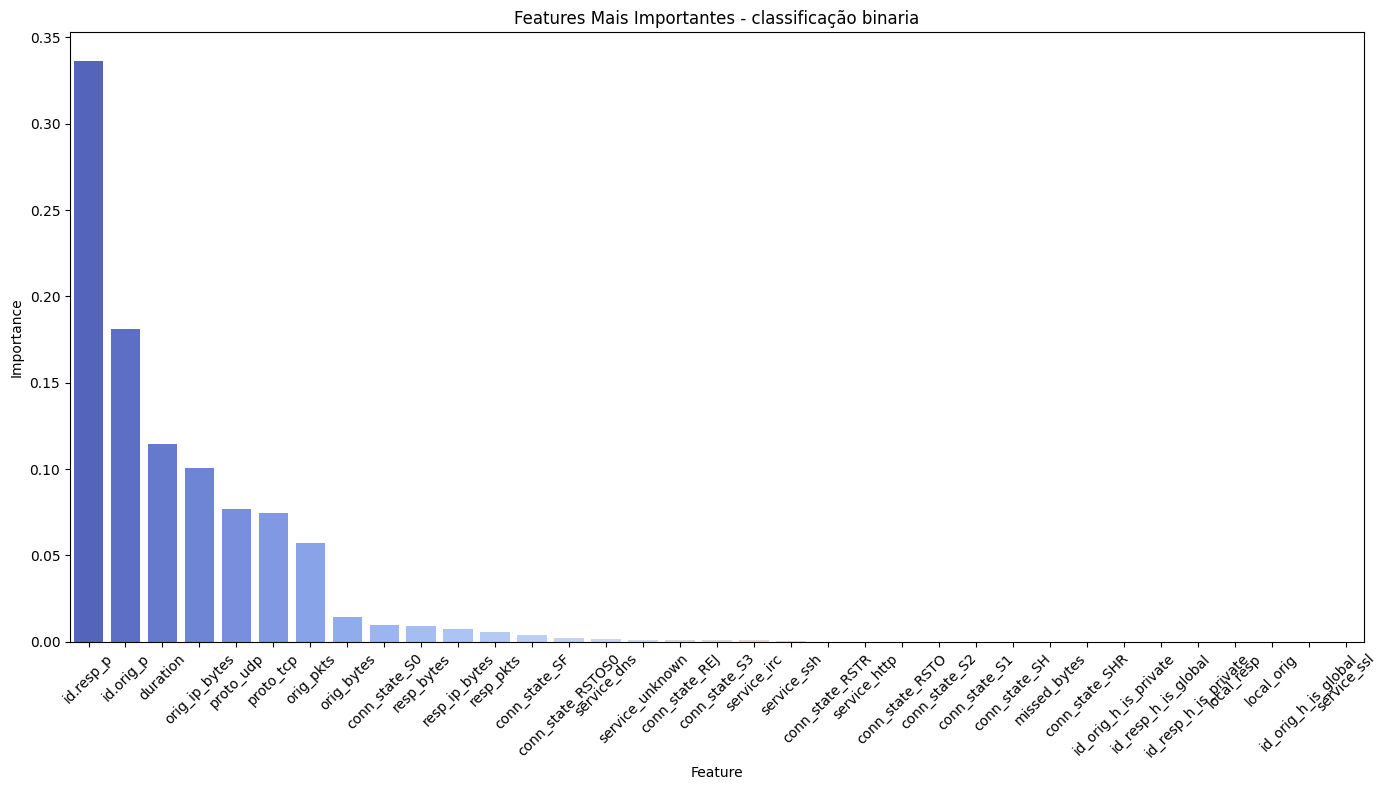

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Separar X e y
X = amostra_balanceada_encoded.drop(columns=['label'])  # Todas as features
y = amostra_balanceada_encoded['label']  # Variável alvo como int (ex: 0 = Benign, 1 = Malicious)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns

# DataFrame com resultados
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=feature_importance_df.head(35), x='Feature', y='Importance', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Features Mais Importantes - classificação binaria')
plt.tight_layout()
plt.show()


In [37]:
# Selecionar as 11 features mais importantes
top_features = feature_importance_df.head(11)['Feature'].tolist()

# Manter apenas essas colunas + 'label'
amostra_reduzida = amostra_balanceada_encoded[top_features + ['label']]


In [38]:
amostra_reduzida.head(11)

,id.resp_p,id.orig_p,duration,orig_ip_bytes,proto_udp,proto_tcp,orig_pkts,orig_bytes,conn_state_S0,resp_bytes,resp_ip_bytes,label
0,23,49163,2.734758,40,False,True,1,1.374978e+07,True,47.469887,0,0
1,23,56448,0.000002,120,False,True,2,0.000000e+00,True,0.000000,0,0
2,23,54580,2.734758,40,False,True,1,1.374978e+07,True,47.469887,0,1
3,80,40948,4.204601,160,False,True,4,0.000000e+00,False,0.000000,0,0
4,81,30297,2.734758,40,False,True,1,1.374978e+07,True,47.469887,0,0
5,8081,24159,0.000004,80,False,True,2,0.000000e+00,True,0.000000,0,0
6,23,42954,2.734758,40,False,True,1,1.374978e+07,True,47.469887,0,0
7,23,63420,0.000002,80,False,True,2,0.000000e+00,True,0.000000,0,0
8,80,65279,2.734758,0,False,True,0,1.374978e+07,False,47.469887,0,0
9,80,18088,0.000001,80,False,True,2,0.000000e+00,True,0.000000,0,0


In [39]:
amostra_reduzida.dtypes

id.resp_p          int64
id.orig_p          int64
duration         float64
orig_ip_bytes      int64
proto_udp           bool
proto_tcp           bool
orig_pkts          int64
orig_bytes       float64
conn_state_S0       bool
resp_bytes       float64
resp_ip_bytes      int64
label              Int64
dtype: object

COMEÇO DO TREINAMENTO DA AMOSTRA BINÁRIA
XGBOOST,RANDOM FOREST E KNN

C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Acurácia: 0.9900
Precisão (malicious): 0.9956
Recall (malicious): 0.9845
F1-score (malicious): 0.9900

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99     10000
   Malicious       0.98      1.00      0.99     10000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



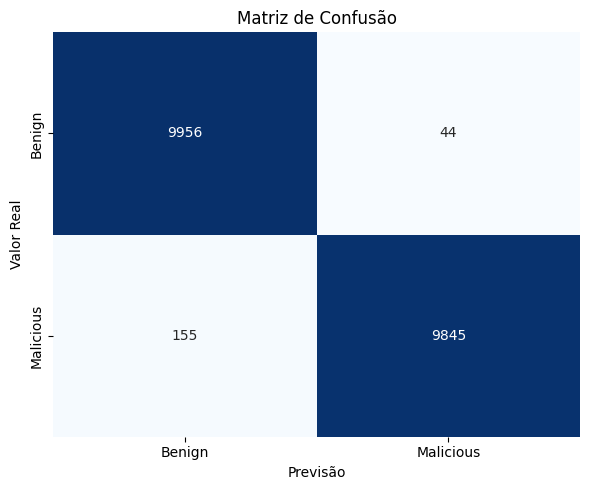

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
X = amostra_reduzida.drop(columns=['label'])
y = amostra_reduzida['label']
# 2. Divisão treino-teste (sem vazamento)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Escalonamento com MinMaxScaler (apenas no treino)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Instanciar modelos
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()

# 5. Voting Classifier (soft voting = média das probabilidades)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('knn', knn)],
    voting='soft'
)

# 6. Treinar modelo
voting_clf.fit(X_train_scaled, y_train)

# 7. Prever
y_pred = voting_clf.predict(X_test_scaled)

# 8. Avaliação
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=0)
rec = recall_score(y_test, y_pred, pos_label=0)
f1 = f1_score(y_test, y_pred, pos_label=0)

print(f"\nAcurácia: {acc:.4f}")
print(f"Precisão (malicious): {prec:.4f}")
print(f"Recall (malicious): {rec:.4f}")
print(f"F1-score (malicious): {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))

# 9. Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:47:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.p

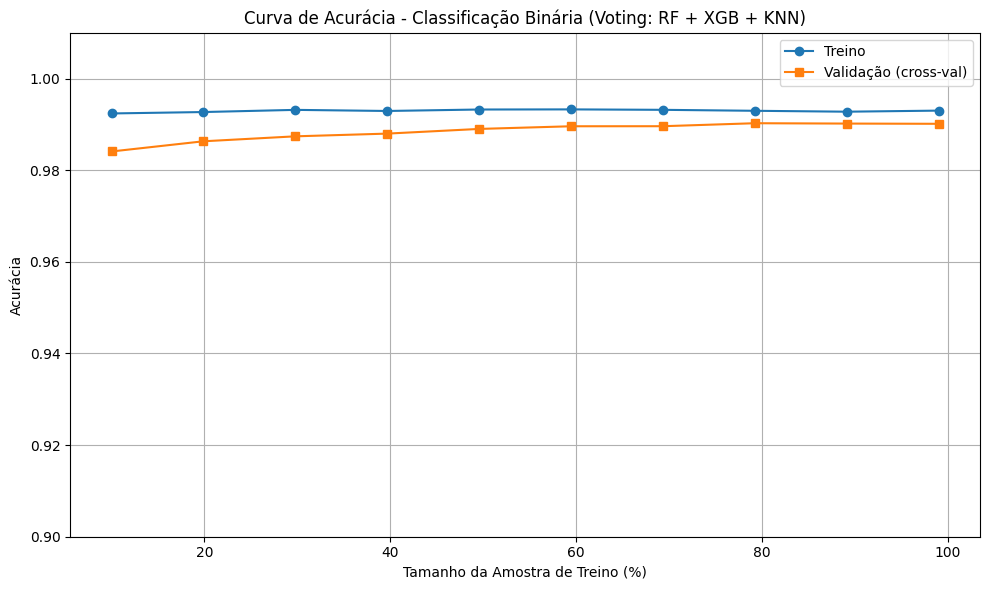

In [41]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Usar o pipeline que você já criou:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 1. Escalonamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Voting Classifier (soft voting)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('knn', knn)],
    voting='soft'
)

# 3. Calcular acurácia usando cross-validation
train_sizes = np.linspace(0.1, 0.99, 10)  # Corrigido
train_scores = []
val_scores = []

for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_scaled, y, train_size=frac, stratify=y, random_state=42)
    scores = cross_val_score(voting_clf, X_part, y_part, cv=5, scoring='accuracy')
    voting_clf.fit(X_part, y_part)
    train_score = voting_clf.score(X_part, y_part)
    
    train_scores.append(train_score)
    val_scores.append(scores.mean())

# 4. Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Treino', marker='o')
plt.plot(train_sizes * 100, val_scores, label='Validação (cross-val)', marker='s')
plt.title('Curva de Acurácia - Classificação Binária (Voting: RF + XGB + KNN)')
plt.xlabel('Tamanho da Amostra de Treino (%)')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:29:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:29:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:29:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.p

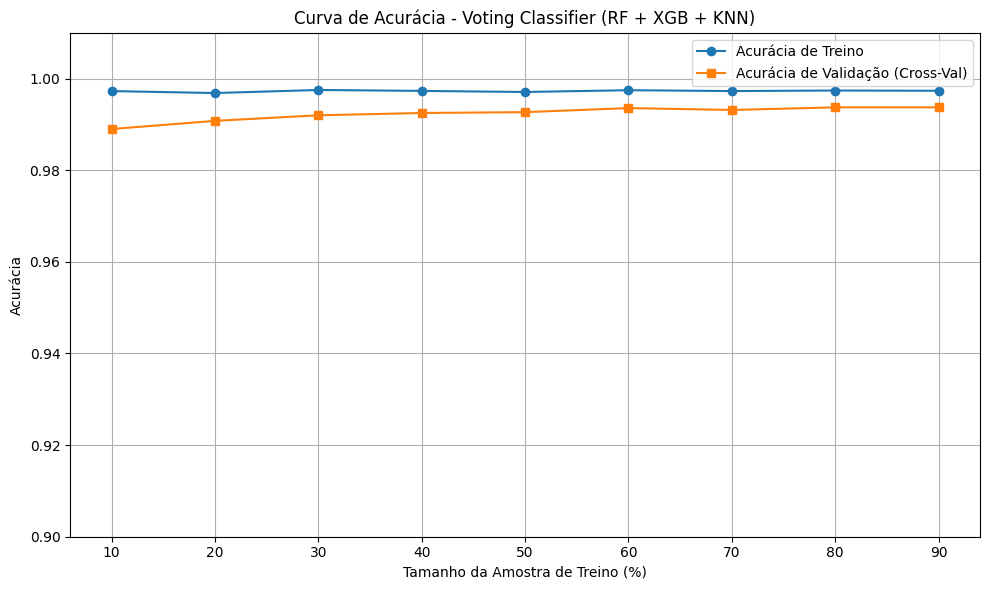

In [74]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# 1. Escalonamento dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Classificadores base
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()

# 3. Ensemble com Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('knn', knn)],
    voting='soft'
)

# 4. Avaliação por fatias de treino
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
val_scores = []

for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X_scaled, y, train_size=float(frac), stratify=y, random_state=42)
    
    # Acurácia de cross-validation
    val_score = cross_val_score(voting_clf, X_part, y_part, cv=5, scoring='accuracy').mean()
    
    # Acurácia de treino (modelo treinado em X_part)
    voting_clf.fit(X_part, y_part)
    train_score = voting_clf.score(X_part, y_part)

    val_scores.append(val_score)
    train_scores.append(train_score)

# 5. Plot da curva de acurácia
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Acurácia de Treino', marker='o')
plt.plot(train_sizes * 100, val_scores, label='Acurácia de Validação (Cross-Val)', marker='s')
plt.title('Curva de Acurácia - Voting Classifier (RF + XGB + KNN)')
plt.xlabel('Tamanho da Amostra de Treino (%)')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:47:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:47:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:47:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.p

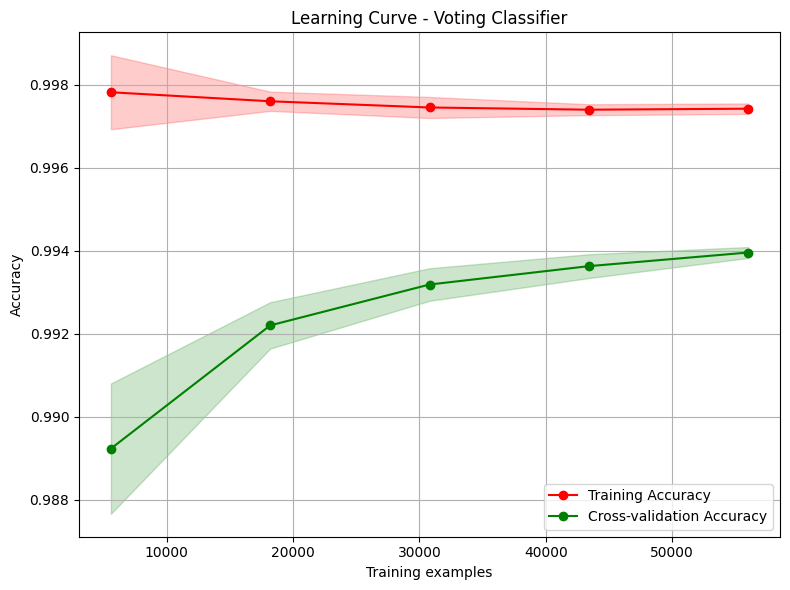

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 1. Escalonamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Modelo híbrido (voting classifier)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('knn', knn)],
    voting='soft'
)

# 3. Curva de aprendizado
train_sizes, train_scores, val_scores = learning_curve(
    voting_clf, X_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# 4. Médias e desvios
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 5. Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='red', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='red')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Voting Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Multiclasse

In [42]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [43]:
for label in df['detailed-label'].unique():
    print(label)


PartOfAHorizontalPortScan
-
DDoS
Okiru
C&C-HeartBeat
C&C-Torii
Attack
C&C
C&C-FileDownload
FileDownload
C&C-HeartBeat-Attack
C&C-PartOfAHorizontalPortScan


In [44]:
df['detailed-label'] = df['detailed-label'].replace('-', 'Benign')


In [45]:
classes_desejadas = [
    'Benign',
    'C&C-HeartBeat',
    'DDoS',
    'Okiru',
    'PartOfAHorizontalPortScan',
    'C&C',
    'Attack'
]

df_filtrado = df[df['detailed-label'].isin(classes_desejadas)]


In [46]:
df_filtrado.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label', '__source_file__'],
      dtype='object')

In [47]:
for label in df_filtrado['detailed-label'].unique():
    print(label)


PartOfAHorizontalPortScan
Benign
DDoS
Okiru
C&C-HeartBeat
Attack
C&C


In [48]:
contagem = df_filtrado['detailed-label'].value_counts()
print(contagem)


detailed-label
PartOfAHorizontalPortScan    412677
Okiru                        130689
Benign                        96589
DDoS                          87737
C&C                           14968
Attack                         1890
C&C-HeartBeat                    90
Name: count, dtype: int64


In [49]:
amostras = []
for classe in classes_desejadas:
    df_classe = df_filtrado[df_filtrado['detailed-label'] == classe]
    
    if len(df_classe) >= 10000:
        amostra = df_classe.sample(n=10000, random_state=42)
    else:
        amostra = df_classe.sample(n=10000, replace=True, random_state=42)
    
    amostras.append(amostra)

# Etapa 5: Concatenar todas as amostras em um único DataFrame
df_balanceado_multiclasse = pd.concat(amostras).reset_index(drop=True)

# Verificar o resultado final
print(df_balanceado_multiclasse['detailed-label'].value_counts())

detailed-label
Benign                       10000
C&C-HeartBeat                10000
DDoS                         10000
Okiru                        10000
PartOfAHorizontalPortScan    10000
C&C                          10000
Attack                       10000
Name: count, dtype: int64


In [50]:
df_balanceado_multiclasse['id.orig_h'] = df_balanceado_multiclasse['id.orig_h'].astype(str)
df_balanceado_multiclasse['id.resp_h'] = df_balanceado_multiclasse['id.resp_h'].astype(str)

# Função para verificar IPs privados
def is_private_ip(ip):
    return (ip.startswith('10.') or 
            ip.startswith('192.168.') or 
            (ip.startswith('172.') and 16 <= int(ip.split('.')[1]) <= 31))

# Criando as colunas booleanas
df_balanceado_multiclasse['id_orig_h_is_private'] = df_balanceado_multiclasse['id.orig_h'].apply(is_private_ip)
df_balanceado_multiclasse['id_orig_h_is_global'] = ~df_balanceado_multiclasse['id_orig_h_is_private']

df_balanceado_multiclasse['id_resp_h_is_private'] = df_balanceado_multiclasse['id.resp_h'].apply(is_private_ip)
df_balanceado_multiclasse['id_resp_h_is_global'] = ~df_balanceado_multiclasse['id_resp_h_is_private']
df_balanceado_multiclasse.drop(columns=['history'], inplace=True)

In [51]:
df_balanceado_multiclasse.dtypes

ts                      float64
uid                      object
id.orig_h                object
id.orig_p                 int64
id.resp_h                object
id.resp_p                 int64
proto                    object
service                  object
duration                 object
orig_bytes               object
resp_bytes               object
conn_state               object
local_orig               object
local_resp               object
missed_bytes              int64
orig_pkts                 int64
orig_ip_bytes             int64
resp_pkts                 int64
resp_ip_bytes             int64
tunnel_parents           object
label                     Int64
detailed-label           object
__source_file__          object
id_orig_h_is_private       bool
id_orig_h_is_global        bool
id_resp_h_is_private       bool
id_resp_h_is_global        bool
dtype: object

In [52]:
import pandas as pd
import numpy as np

# Substituir '-' e '(empty)' por NaN
df_balanceado_multiclasse.replace(['-', '(empty)'], np.nan, inplace=True)

# Colunas numericamente esperadas
numeric_cols = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
                'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']

# Converter colunas numéricas
for col in numeric_cols:
    if col in df_balanceado_multiclasse.columns:
        df_balanceado_multiclasse[col] = pd.to_numeric(df_balanceado_multiclasse[col], errors='coerce')

# Preencher NaNs nas numéricas com média
df_balanceado_multiclasse[numeric_cols] = df_balanceado_multiclasse[numeric_cols].fillna(
    df_balanceado_multiclasse[numeric_cols].mean()
)

# Remover colunas indesejadas
cols_to_drop = ['label', '__source_file__', 'uid', 'id.orig_h', 'id.resp_h']
df_balanceado_multiclasse.drop(columns=[col for col in cols_to_drop if col in df_balanceado_multiclasse.columns], inplace=True)

# Atualizar colunas categóricas
cat_cols = df_balanceado_multiclasse.select_dtypes(include=['object', 'category']).columns

# Filtrar colunas categóricas de baixa cardinalidade, excluindo 'detailed-label'
cat_cardinality = df_balanceado_multiclasse[cat_cols].nunique()
cat_cols_low_card = cat_cardinality[cat_cardinality <= 20].index.tolist()

# Remover 'detailed-label' da lista de colunas para one-hot encoding, se estiver presente
if 'detailed-label' in cat_cols_low_card:
    cat_cols_low_card.remove('detailed-label')

# Substituir NaNs das categóricas por 'unknown'
df_balanceado_multiclasse[cat_cols_low_card] = df_balanceado_multiclasse[cat_cols_low_card].fillna('unknown')

# Aplicar one-hot encoding só nas categóricas de baixa cardinalidade (excluindo 'detailed-label')
df_balanceado_multiclasse_encoded = pd.get_dummies(df_balanceado_multiclasse, columns=cat_cols_low_card, drop_first=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\186019343.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_balanceado_multiclasse.replace(['-', '(empty)'], np.nan, inplace=True)


In [53]:
df_balanceado_multiclasse_encoded = df_balanceado_multiclasse_encoded.drop(columns=['tunnel_parents_COLnd035cNITygYHp3','tunnel_parents_unknown'])
df_balanceado_multiclasse_encoded = df_balanceado_multiclasse_encoded.drop(columns=['ts'])


In [54]:
df_balanceado_multiclasse_encoded.dtypes

id.orig_p                 int64
id.resp_p                 int64
duration                float64
orig_bytes              float64
resp_bytes              float64
local_orig              float64
local_resp              float64
missed_bytes              int64
orig_pkts                 int64
orig_ip_bytes             int64
resp_pkts                 int64
resp_ip_bytes             int64
detailed-label           object
id_orig_h_is_private       bool
id_orig_h_is_global        bool
id_resp_h_is_private       bool
id_resp_h_is_global        bool
proto_tcp                  bool
proto_udp                  bool
service_http               bool
service_irc                bool
service_ssh                bool
service_ssl                bool
service_unknown            bool
conn_state_REJ             bool
conn_state_RSTO            bool
conn_state_RSTOS0          bool
conn_state_RSTR            bool
conn_state_S0              bool
conn_state_S1              bool
conn_state_S2              bool
conn_sta

C:\Users\arthu\AppData\Local\Temp\ipykernel_23556\2232292240.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(35), x='Feature', y='Importance', palette='coolwarm')


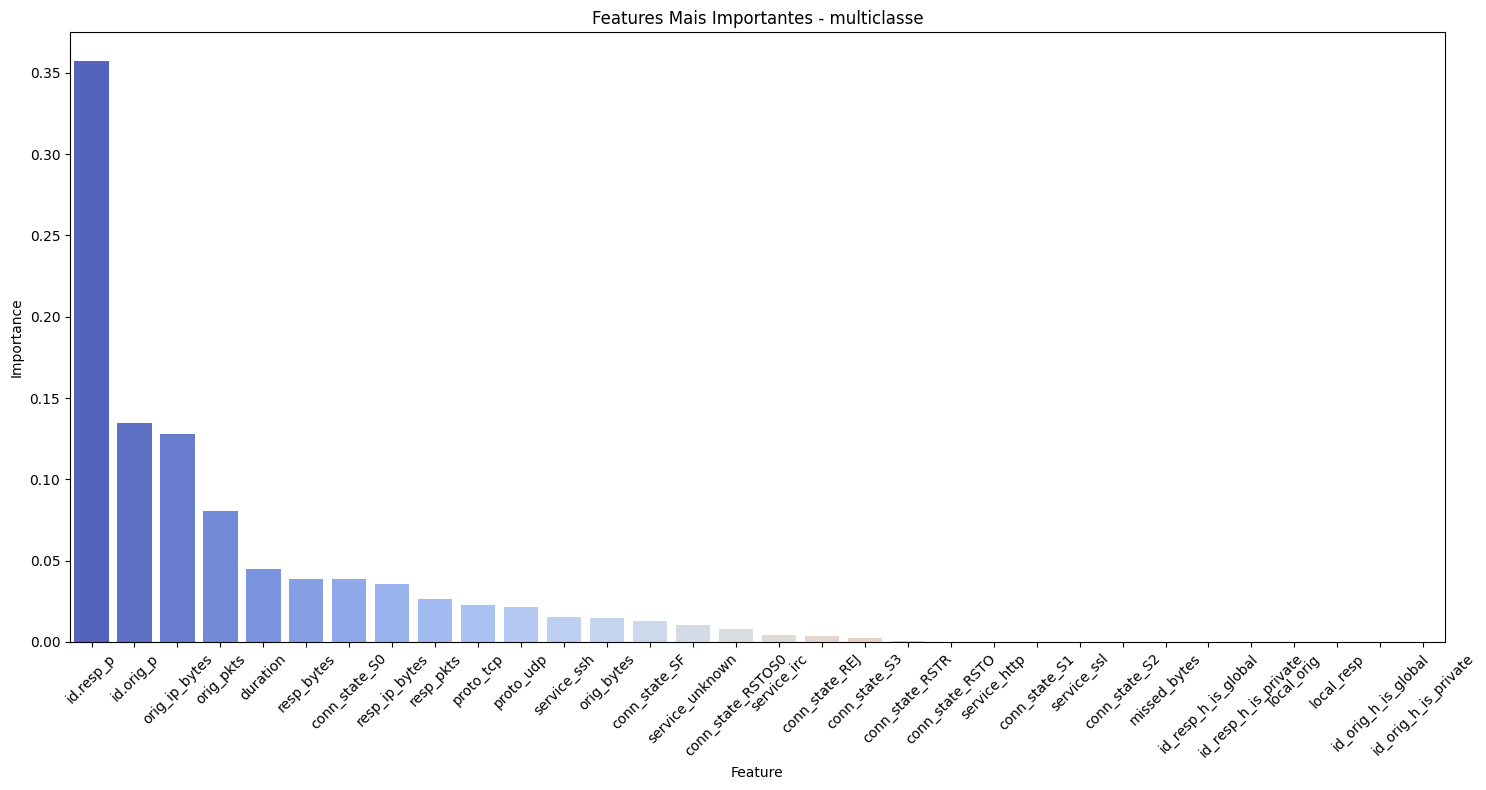

In [55]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Separar X e y
X = df_balanceado_multiclasse_encoded.drop(columns=['detailed-label'])  # Todas as features
y = df_balanceado_multiclasse_encoded['detailed-label']  

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns

# DataFrame com resultados
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(data=feature_importance_df.head(35), x='Feature', y='Importance', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Features Mais Importantes - multiclasse')
plt.tight_layout()
plt.show()


In [56]:
# Selecionar as 11 features mais importantes
top_features = feature_importance_df.head(11)['Feature'].tolist()

# Manter apenas essas colunas + 'label'
amostra_reduzida_multiclasse = df_balanceado_multiclasse_encoded[top_features + ['detailed-label']]


In [57]:
amostra_reduzida_multiclasse.dtypes

id.resp_p           int64
id.orig_p           int64
orig_ip_bytes       int64
orig_pkts           int64
duration          float64
resp_bytes        float64
conn_state_S0        bool
resp_ip_bytes       int64
resp_pkts           int64
proto_tcp            bool
proto_udp            bool
detailed-label     object
dtype: object

C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1965
                   Benign       0.97      1.00      0.98      2008
                      C&C       1.00      1.00      1.00      1997
            C&C-HeartBeat       1.00      1.00      1.00      1980
                     DDoS       1.00      1.00      1.00      1961
                    Okiru       1.00      1.00      1.00      2052
PartOfAHorizontalPortScan       1.00      0.97      0.99      2037

                 accuracy                           1.00     14000
                macro avg       1.00      1.00      1.00     14000
             weighted avg       1.00      1.00      1.00     14000



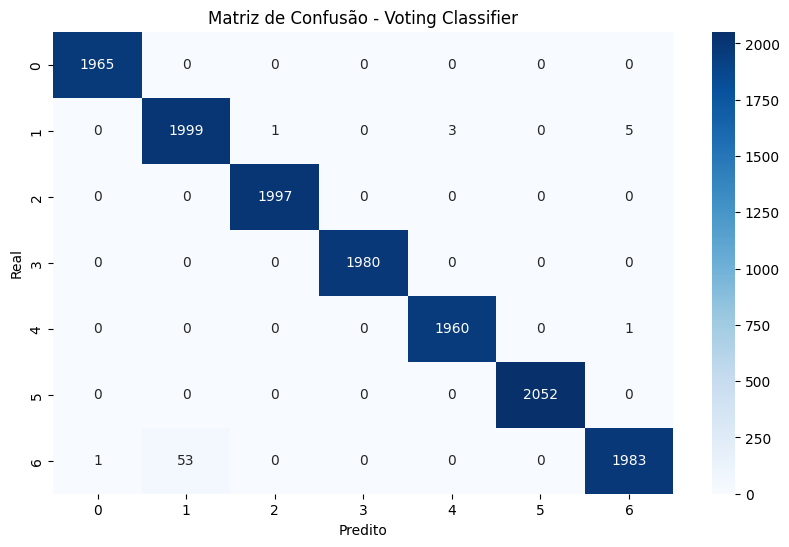

In [58]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar X e y
X = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])  # Todas as features
y = amostra_reduzida_multiclasse['detailed-label']  # Variável alvo codificada como int

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Ensemble com votação
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('ada', ada)
    ],
    voting='hard'  # ou 'soft' se quiser ponderar pelas probabilidades
)

# Treinar o ensemble
voting_clf.fit(X_train, y_train)

# Avaliação
y_pred = voting_clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Voting Classifier')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1965
                   Benign       0.97      1.00      0.98      2008
                      C&C       1.00      1.00      1.00      1997
            C&C-HeartBeat       1.00      1.00      1.00      1980
                     DDoS       1.00      1.00      1.00      1961
                    Okiru       1.00      1.00      1.00      2052
PartOfAHorizontalPortScan       1.00      0.97      0.98      2037

                 accuracy                           1.00     14000
                macro avg       1.00      1.00      1.00     14000
             weighted avg       1.00      1.00      1.00     14000



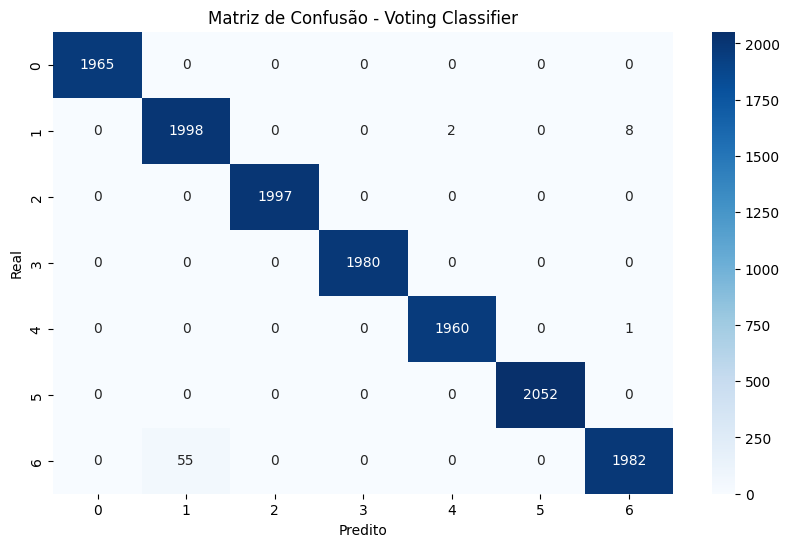

In [59]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar X e y
X = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])  # Todas as features
y = amostra_reduzida_multiclasse['detailed-label']  # Variável alvo codificada como int

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Ensemble com votação
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('ada', ada)
    ],
    voting='soft'  # ou 'soft' se quiser ponderar pelas probabilidades
)

# Treinar o ensemble
voting_clf.fit(X_train, y_train)

# Avaliação
y_pred = voting_clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Voting Classifier')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:11:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      2000
                   Benign       0.97      1.00      0.98      2000
                      C&C       1.00      1.00      1.00      2000
            C&C-HeartBeat       1.00      1.00      1.00      2000
                     DDoS       1.00      1.00      1.00      2000
                    Okiru       1.00      1.00      1.00      2000
PartOfAHorizontalPortScan       1.00      0.97      0.98      2000

                 accuracy                           0.99     14000
                macro avg       1.00      0.99      0.99     14000
             weighted avg       1.00      0.99      0.99     14000



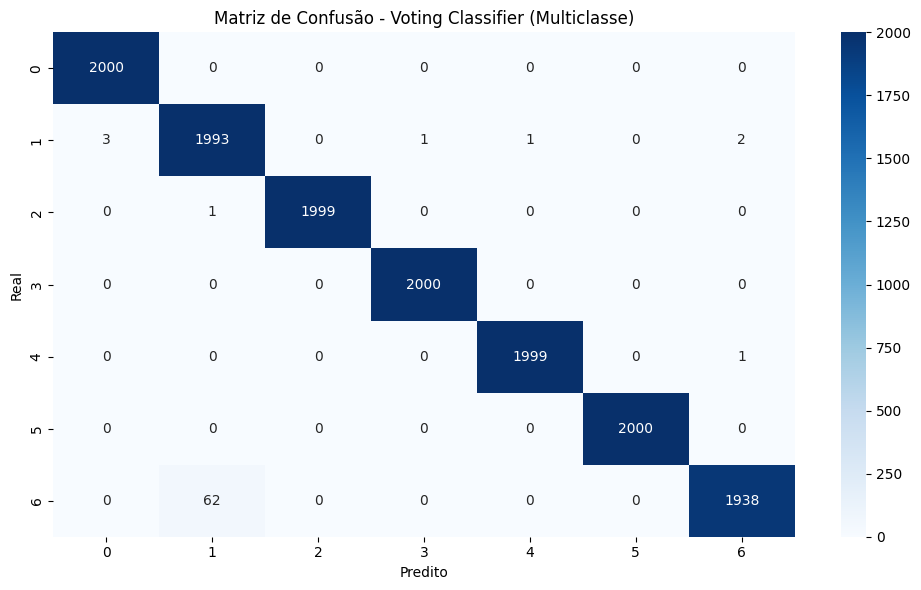

In [75]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Separar X e y
X = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])  # Todas as features
y = amostra_reduzida_multiclasse['detailed-label']  # Classe alvo

# 2. Divisão treino/teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Normalização (aplicada apenas nos dados de treino)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit + transform no treino
X_test_scaled = scaler.transform(X_test)         # Apenas transform no teste

# 4. Modelos base (como no artigo)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# 5. Ensemble com votação (hard ou soft)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('ada', ada)
    ],
    voting='hard'  # ou 'soft' se preferir médias de probabilidades
)

# 6. Treinar o ensemble
voting_clf.fit(X_train_scaled, y_train)

# 7. Avaliação no conjunto de teste
y_pred = voting_clf.predict(X_test_scaled)

# 8. Relatório de classificação
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 9. Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Voting Classifier (Multiclasse)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:54:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.p

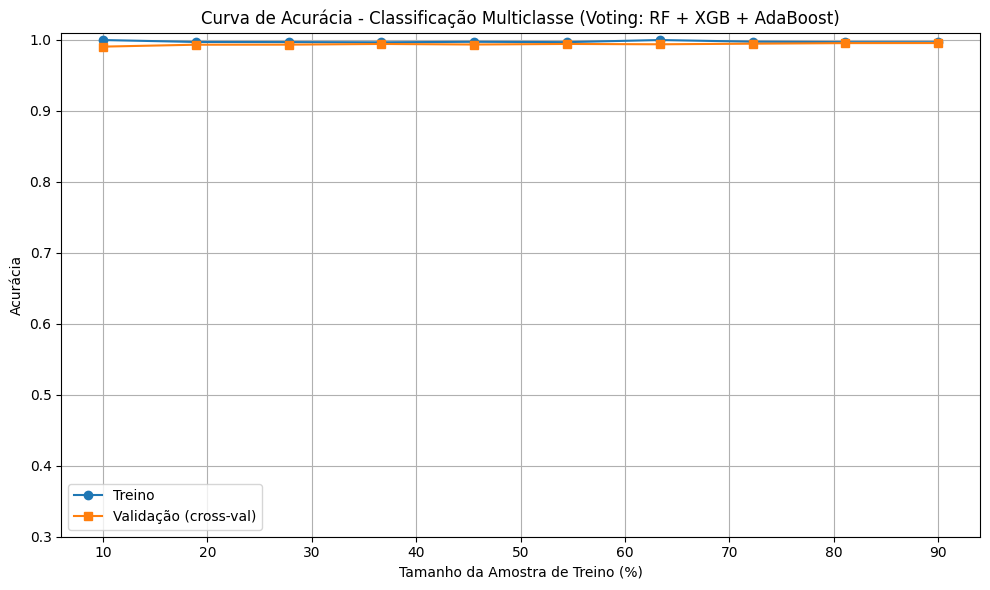

In [60]:
# Modelos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Dados
X = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])
y = amostra_reduzida_multiclasse['detailed-label']

# Modelo híbrido
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

voting_clf_multi = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('ada', ada)],
    voting='hard'
)

# Avaliar em múltiplos tamanhos de treino
train_sizes = np.linspace(0.1, 0.9, 10)
train_scores = []
val_scores = []

for frac in train_sizes:
    X_part, _, y_part, _ = train_test_split(X, y, train_size=frac, stratify=y, random_state=42)
    scores = cross_val_score(voting_clf_multi, X_part, y_part, cv=5, scoring='accuracy')
    voting_clf_multi.fit(X_part, y_part)
    train_score = voting_clf_multi.score(X_part, y_part)

    train_scores.append(train_score)
    val_scores.append(scores.mean())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, train_scores, label='Treino', marker='o')
plt.plot(train_sizes * 100, val_scores, label='Validação (cross-val)', marker='s')
plt.title('Curva de Acurácia - Classificação Multiclasse (Voting: RF + XGB + AdaBoost)')
plt.xlabel('Tamanho da Amostra de Treino (%)')
plt.ylabel('Acurácia')
plt.ylim(0.3, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:51:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\xgboost\training.p

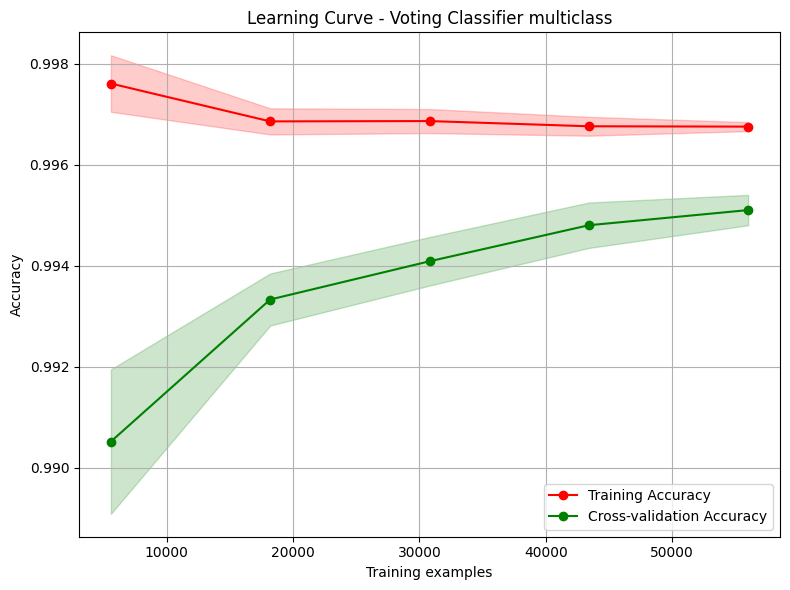

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# 1. Escalonamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Modelo híbrido (voting classifier)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
knn = KNeighborsClassifier()

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('ada', ada)],
    voting='soft'
)

# 3. Curva de aprendizado
train_sizes, train_scores, val_scores = learning_curve(
    voting_clf, X_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

# 4. Médias e desvios
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# 5. Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', color='red', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='red')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation Accuracy')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Voting Classifier multiclass")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


Relatório de Classificação (Binária):
               precision    recall  f1-score   support

         0.0       0.89      0.71      0.79     10078
         1.0       0.75      0.91      0.82      9922

    accuracy                           0.81     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000



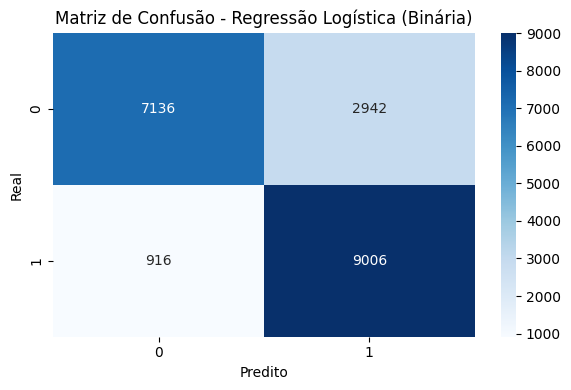

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# Modelo
logreg_bin = LogisticRegression(max_iter=1000, random_state=42)
logreg_bin.fit(X_train_bin, y_train_bin)

# Predição e avaliação
y_pred_bin = logreg_bin.predict(X_test_bin)
print("Relatório de Classificação (Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística (Binária)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Relatório de Classificação (Multiclasse):
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1965
                   Benign       0.96      0.37      0.54      2008
                      C&C       0.50      0.86      0.63      1997
            C&C-HeartBeat       0.76      0.78      0.77      1980
                     DDoS       0.92      0.86      0.89      1961
                    Okiru       0.85      0.99      0.91      2052
PartOfAHorizontalPortScan       0.64      0.50      0.56      2037

                 accuracy                           0.76     14000
                macro avg       0.80      0.76      0.76     14000
             weighted avg       0.80      0.76      0.76     14000



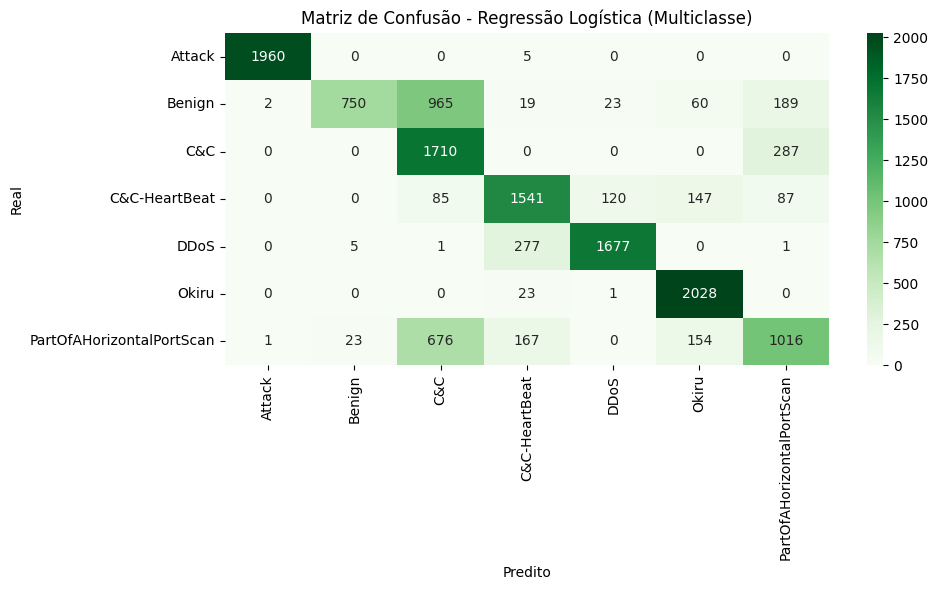

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Separar X e y
X_multi = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])
y_multi = amostra_reduzida_multiclasse['detailed-label']

# Normalização
scaler_multi = StandardScaler()
X_multi_scaled = scaler_multi.fit_transform(X_multi)

# Treino/teste
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_scaled, y_multi, test_size=0.2, random_state=42)

# Modelo com suporte a multiclasse
logreg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg_multi.fit(X_train_multi, y_train_multi)

# Predição e avaliação
y_pred_multi = logreg_multi.predict(X_test_multi)
print("Relatório de Classificação (Multiclasse):\n", classification_report(y_test_multi, y_pred_multi))

# Matriz de confusão
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_multi, y_pred_multi), annot=True, fmt='d', cmap='Greens',
            xticklabels=logreg_multi.classes_, yticklabels=logreg_multi.classes_)
plt.title("Matriz de Confusão - Regressão Logística (Multiclasse)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


MLP

Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.98      0.89      0.94     10078
         1.0       0.90      0.98      0.94      9922

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



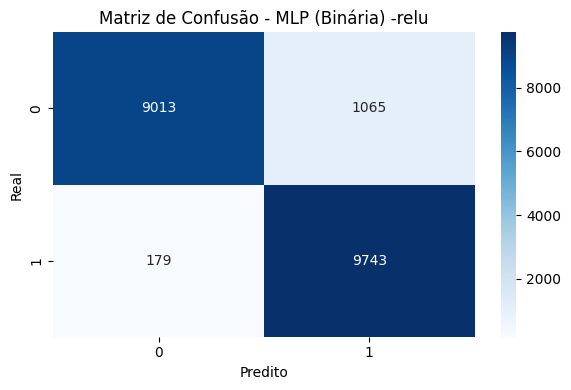

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) -relu")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.96      0.89      0.92     10078
         1.0       0.90      0.96      0.93      9922

    accuracy                           0.92     20000
   macro avg       0.93      0.93      0.92     20000
weighted avg       0.93      0.92      0.92     20000



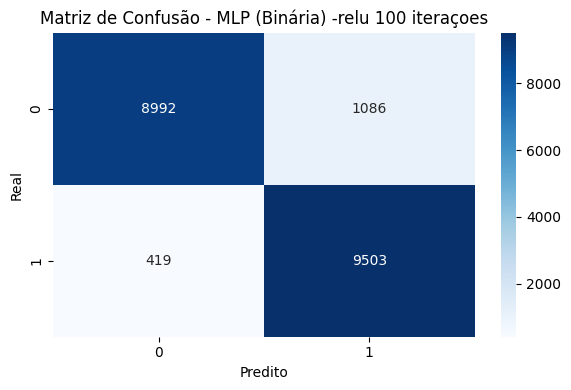

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=100, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) -relu 100 iteraçoes")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.89      0.86      0.87     10078
         1.0       0.86      0.89      0.88      9922

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



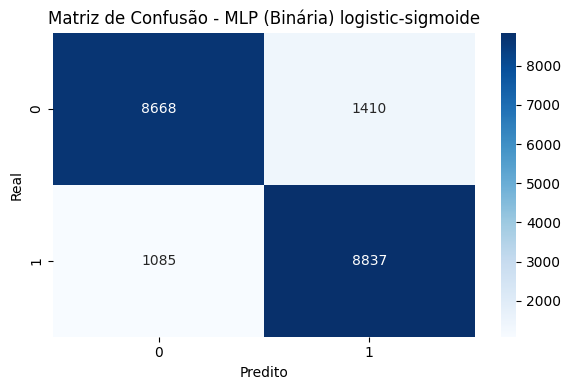

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) logistic-sigmoide")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.90      0.79      0.84     10078
         1.0       0.81      0.91      0.86      9922

    accuracy                           0.85     20000
   macro avg       0.86      0.85      0.85     20000
weighted avg       0.86      0.85      0.85     20000



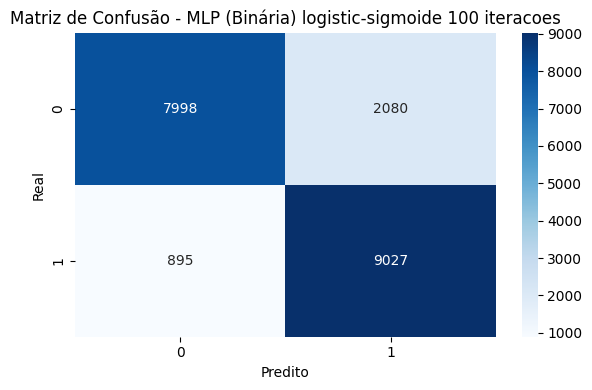

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='logistic', max_iter=100, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) logistic-sigmoide 100 iteracoes")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     10078
         1.0       0.75      0.94      0.83      9922

    accuracy                           0.81     20000
   macro avg       0.83      0.81      0.81     20000
weighted avg       0.84      0.81      0.81     20000



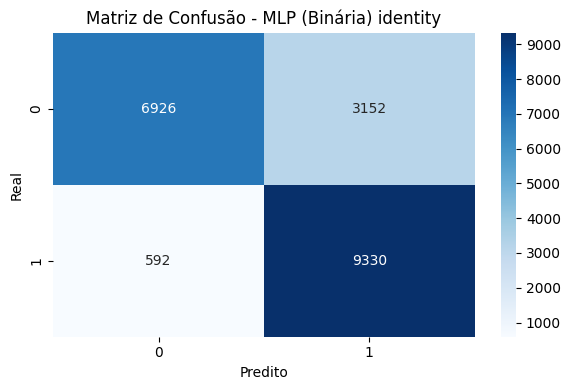

In [67]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='identity', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) identity")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79     10078
         1.0       0.75      0.94      0.83      9922

    accuracy                           0.81     20000
   macro avg       0.83      0.81      0.81     20000
weighted avg       0.84      0.81      0.81     20000



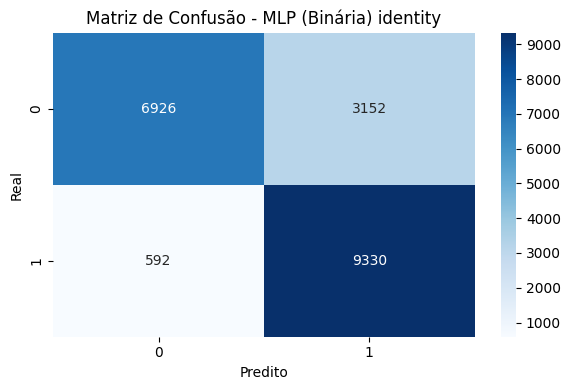

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='identity', max_iter=100, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) identity")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     10078
         1.0       0.90      0.99      0.95      9922

    accuracy                           0.94     20000
   macro avg       0.95      0.94      0.94     20000
weighted avg       0.95      0.94      0.94     20000



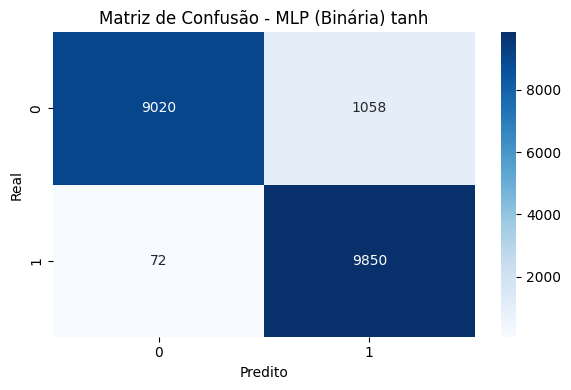

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) tanh")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Relatório de Classificação (MLP - Binária):
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     10078
         1.0       0.91      0.94      0.92      9922

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



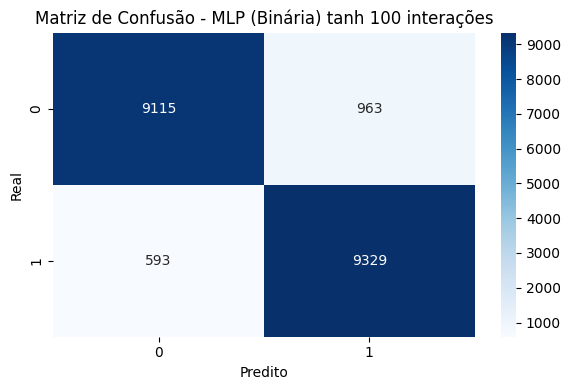

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida.drop(columns=['label'])
y_bin = amostra_reduzida['label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=100, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - Binária):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Binária) tanh 100 interações")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - multiclasse):
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1965
                   Benign       0.82      0.84      0.83      2008
                      C&C       0.85      0.99      0.91      1997
            C&C-HeartBeat       1.00      1.00      1.00      1980
                     DDoS       1.00      1.00      1.00      1961
                    Okiru       1.00      1.00      1.00      2052
PartOfAHorizontalPortScan       0.96      0.79      0.87      2037

                 accuracy                           0.94     14000
                macro avg       0.95      0.94      0.94     14000
             weighted avg       0.95      0.94      0.94     14000



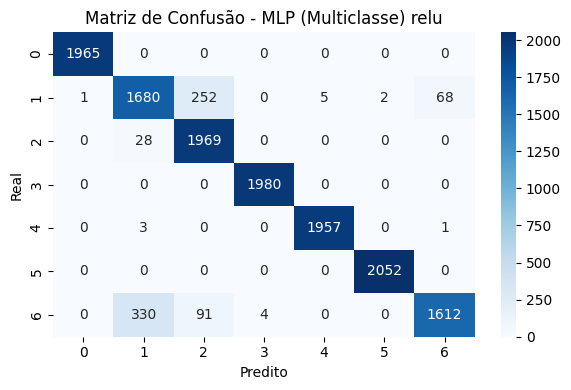

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])
y_bin = amostra_reduzida_multiclasse['detailed-label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - multiclasse):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Multiclasse) relu")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


C:\Users\arthu\OneDrive\Documentos\TrabalhoIoTMachineLearning\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Relatório de Classificação (MLP - multiclasse):
                            precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00      1965
                   Benign       0.84      0.82      0.83      2008
                      C&C       0.85      1.00      0.92      1997
            C&C-HeartBeat       1.00      1.00      1.00      1980
                     DDoS       1.00      1.00      1.00      1961
                    Okiru       1.00      1.00      1.00      2052
PartOfAHorizontalPortScan       0.94      0.81      0.87      2037

                 accuracy                           0.95     14000
                macro avg       0.95      0.95      0.95     14000
             weighted avg       0.95      0.95      0.95     14000



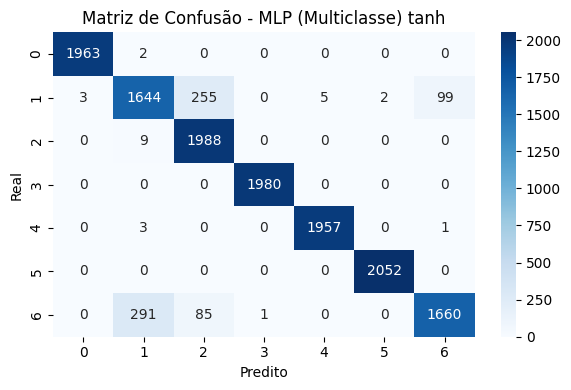

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])
y_bin = amostra_reduzida_multiclasse['detailed-label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='tanh', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - multiclasse):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Multiclasse) tanh")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Relatório de Classificação (MLP - multiclasse):
                            precision    recall  f1-score   support

                   Attack       0.99      1.00      1.00      1965
                   Benign       0.61      0.53      0.57      2008
                      C&C       0.61      1.00      0.75      1997
            C&C-HeartBeat       0.96      0.96      0.96      1980
                     DDoS       1.00      1.00      1.00      1961
                    Okiru       0.90      0.99      0.94      2052
PartOfAHorizontalPortScan       0.94      0.37      0.53      2037

                 accuracy                           0.83     14000
                macro avg       0.86      0.83      0.82     14000
             weighted avg       0.86      0.83      0.82     14000



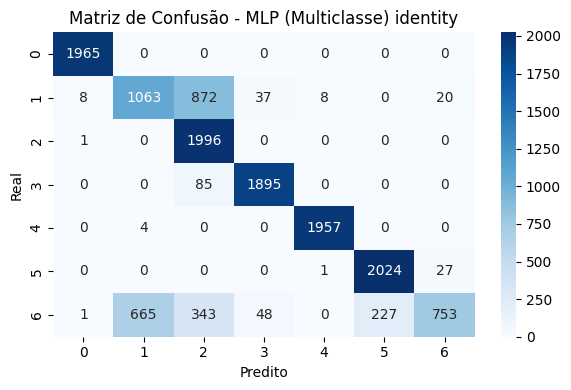

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separar X e y
X_bin = amostra_reduzida_multiclasse.drop(columns=['detailed-label'])
y_bin = amostra_reduzida_multiclasse['detailed-label']

# Normalização
scaler_bin = StandardScaler()
X_bin_scaled = scaler_bin.fit_transform(X_bin)

# Divisão treino/teste
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin_scaled, y_bin, test_size=0.2, random_state=42)

# MLP para classificação binária
mlp_bin = MLPClassifier(hidden_layer_sizes=(100, 50), activation='identity', max_iter=300, random_state=42)
mlp_bin.fit(X_train_bin, y_train_bin)

# Avaliação
y_pred_bin = mlp_bin.predict(X_test_bin)
print("Relatório de Classificação (MLP - multiclasse):\n", classification_report(y_test_bin, y_pred_bin))

# Matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bin, y_pred_bin), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - MLP (Multiclasse) identity")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
